<a href="https://colab.research.google.com/github/EnzoPeralta96/convolution_correlation_signal/blob/main/C%C3%B3digo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Canción cargada: /content/drive/MyDrive/MN2-CC-Proyecto Final/cancion_no_reggae_3.wav (7503872 muestras)
Patrón cargado: /content/drive/MyDrive/MN2-CC-Proyecto Final/patron.wav (10632960 muestras)


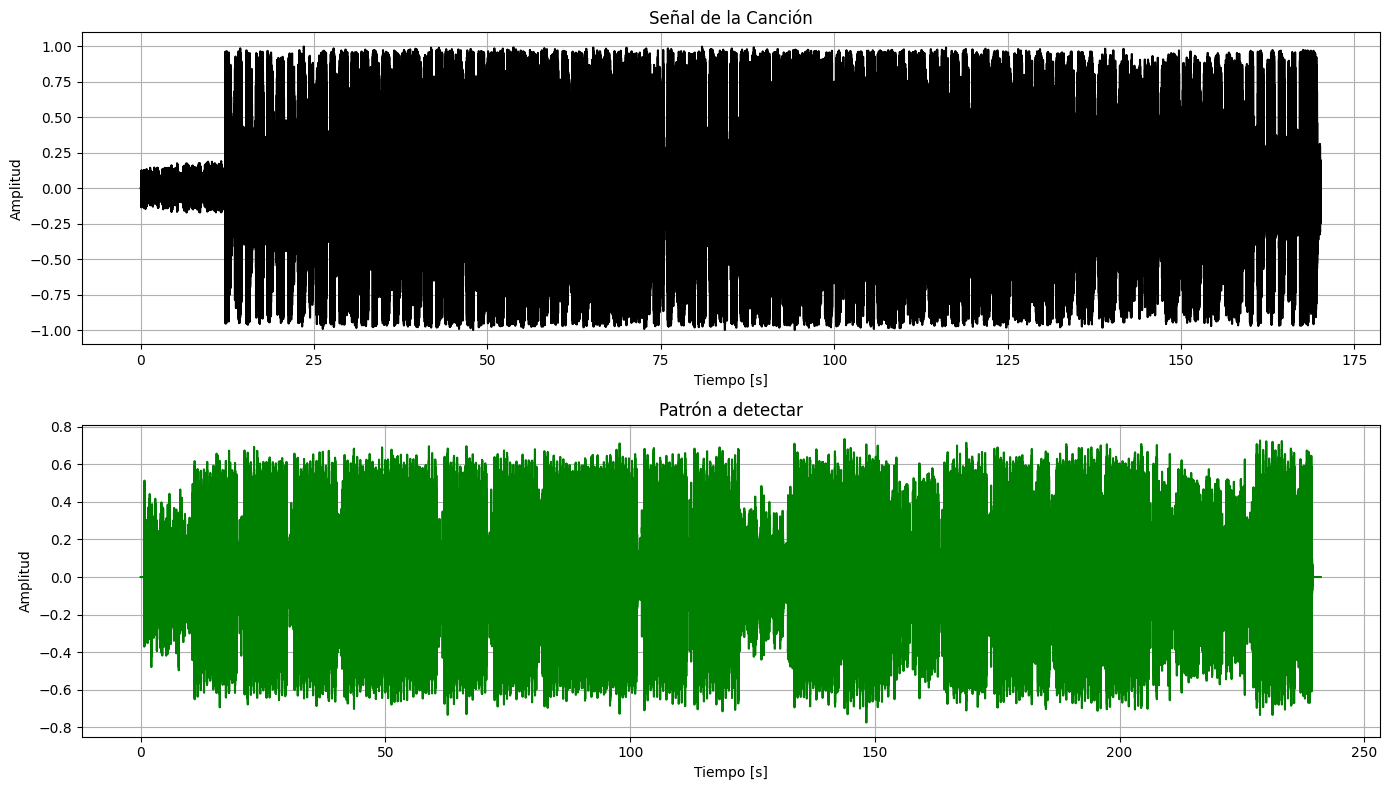

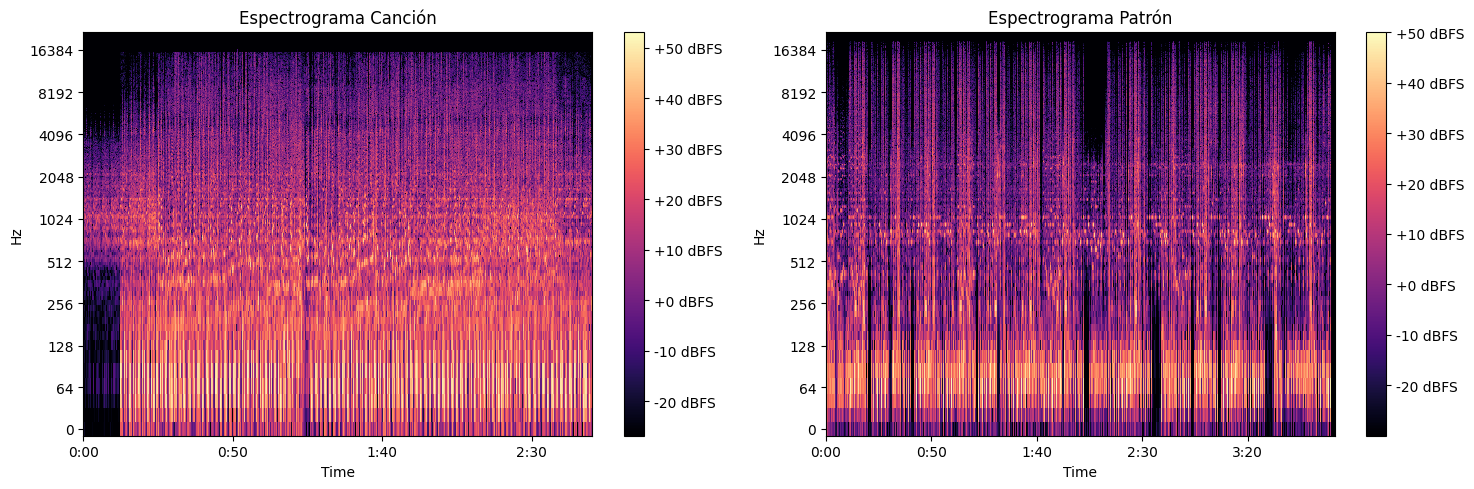

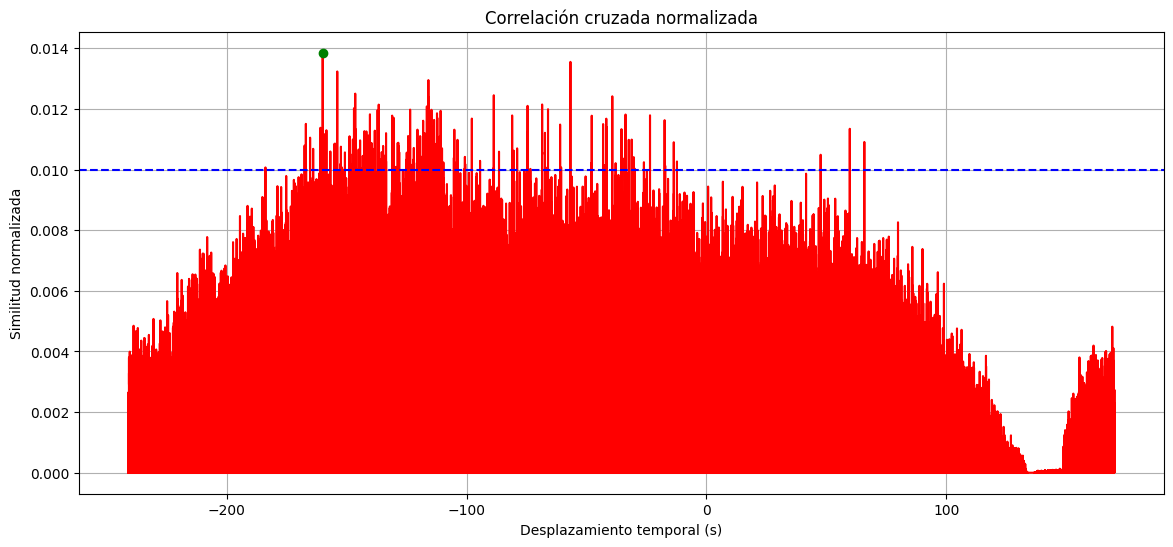


--- Resultados ---
Pico Máximo de Correlación (R_max): 0.0139

Conclusión: La canción pertenece al género


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

TASA_MUESTREO = 44100 # Tasa de muestreo estándar (44.1kHz)
TAU = 0.01 # Threshold para la correlacion

CANCION_FILE = '/content/drive/MyDrive/MN2-CC-Proyecto Final/cancion_no_reggae_3.wav'
PATRON_FILE = '/content/drive/MyDrive/MN2-CC-Proyecto Final/patron.wav'

def cargar_audio_y_patron(cancion_path, patron_path, sr):
  try:
    x, _ = librosa.load(cancion_path, sr=sr)
    p, _ = librosa.load(patron_path, sr=sr)
    print(f"Canción cargada: {cancion_path} ({len(x)} muestras)")
    print(f"Patrón cargado: {patron_path} ({len(p)} muestras)")
    return x, p
  except Exception as e:
    print(f"Error al cargar archivos de audio: {e}")
    return None, None

def correlacion_rapida_fft(x, p):
  N_x = len(x)
  N_p = len(p)
  N = N_x + N_p - 1

  X = np.fft.fft(x, N)
  P = np.fft.fft(p, N)

  r = np.fft.ifft(X * np.conjugate(P))
  r = np.real(r)

  r = np.fft.fftshift(r)

  energy_x = np.sum(x**2)
  energy_p = np.sum(p**2)

  denom = np.sqrt(energy_x * energy_p)
  r_norm = np.abs(r / denom)

  lags = np.arange(-(N_p - 1), N_x)
  return r_norm, lags

def plot_espectros(x, p, sr):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    Sx = np.abs(librosa.stft(x))
    Sx_db = librosa.amplitude_to_db(Sx)

    librosa.display.specshow(
        Sx_db,
        sr=sr,
        x_axis='time',
        y_axis='log',
        cmap='magma'
    )

    plt.colorbar(format="%+2.0f dBFS")
    plt.title("Espectrograma Canción")

    plt.subplot(1, 2, 2)
    Sp = np.abs(librosa.stft(p))
    Sp_db = librosa.amplitude_to_db(Sp)

    librosa.display.specshow(
        Sp_db,
        sr=sr,
        x_axis='time',
        y_axis='log',
        cmap='magma'
    )

    plt.colorbar(format="%+2.0f dBFS")
    plt.title("Espectrograma Patrón")

    plt.tight_layout()
    plt.show()

def plot_canciones(x, p, sr):
  t_x = np.arange(len(x)) / sr
  t_p = np.arange(len(p)) / sr

  plt.figure(figsize=(14, 8))

  plt.subplot(2, 1, 1)
  plt.plot(t_x, x, color='black')
  plt.title("Señal de la Canción")
  plt.xlabel("Tiempo [s]")
  plt.ylabel("Amplitud")
  plt.grid(True)

  plt.subplot(2, 1, 2)
  plt.plot(t_p, p, color='green')
  plt.title("Patrón a detectar")
  plt.xlabel("Tiempo [s]")
  plt.ylabel("Amplitud")
  plt.grid(True)

  plt.tight_layout()
  plt.show()

def plot_resultado(r_xp_norm, lags, tau, sr):
  t = lags / sr

  idx_max = np.argmax(r_xp_norm)
  R_max = r_xp_norm[idx_max]
  t_peak = t[idx_max]

  plt.figure(figsize=(14,6))
  plt.plot(t, r_xp_norm, color='red', label='Correlación normalizada')
  plt.axhline(tau, color='blue', linestyle='--', label='Umbral')
  plt.plot(t_peak, R_max, 'go', label=f'Pico: {t_peak:.4f}s')

  plt.xlabel("Desplazamiento temporal (s)")
  plt.ylabel("Similitud normalizada")
  plt.title("Correlación cruzada normalizada")
  plt.grid()
  plt.show()

  return R_max, t_peak

x, p = cargar_audio_y_patron(CANCION_FILE, PATRON_FILE, TASA_MUESTREO)

r, lags = correlacion_rapida_fft(x, p)

plot_canciones(x, p, TASA_MUESTREO)
plot_espectros(x, p, TASA_MUESTREO)
R_max, t_peak = plot_resultado(r, lags, TAU, TASA_MUESTREO)

print("\n--- Resultados ---")
print(f"Pico Máximo de Correlación (R_max): {R_max:.4f}")

if R_max > TAU:
  print("\nConclusión: La canción pertenece al género")
else:
  print("\nConclusión: La canción no pertenece al género")